In [39]:
!pip install wordcloud

In [48]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [41]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Akarsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

##  Business problem
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining


##    2 - Data collection and description


## 2.1 Connecting to Amazom and download reviews

In [13]:
oneplus_reviews=[]

In [18]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = .get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

SyntaxError: invalid syntax (Temp/ipykernel_10188/2029344792.py, line 4)

In [15]:
!pip install requests

In [17]:
from bs4 import BeautifulSoup 
import requests 
page = requests.get("https://www.google.dz/search?q=see") 
soup = BeautifulSoup(page.content) 
links = soup.findAll("a") 
for link in links: 
    if link['href'].startswith('/url?q='): 
        print (link['href'].replace('/url?q=',''))

https://www.imdb.com/title/tt7949218/&sa=U&ved=2ahUKEwjd5-zh5PX3AhWQIUQIHdiHDJIQoiR6BAgJEBA&usg=AOvVaw3jYDhuxy3WiF1IY4Kep8gX
https://www.rottentomatoes.com/tv/see&sa=U&ved=2ahUKEwjd5-zh5PX3AhWQIUQIHdiHDJIQoiR6BAgJEBI&usg=AOvVaw1v4CLwFwh2X1PMlspORP0f
https://www.youtube.com/watch%3Fv%3D7Rg0y7NT1gU&sa=U&ved=2ahUKEwjd5-zh5PX3AhWQIUQIHdiHDJIQtwJ6BAgDEAE&usg=AOvVaw1ZdkZcIOfSAJh4VmrMaDZx
https://www.youtube.com/watch%3Fv%3D7Rg0y7NT1gU&sa=U&ved=2ahUKEwjd5-zh5PX3AhWQIUQIHdiHDJIQuAJ6BAgDEAI&usg=AOvVaw2DcPpDxwatC2fGpAPxnQV-
https://www.youtube.com/watch%3Fv%3DWTVWaNwTRaE&sa=U&ved=2ahUKEwjd5-zh5PX3AhWQIUQIHdiHDJIQtwJ6BAgAEAE&usg=AOvVaw2SqTOMa2hm6ODoUndIOEnD
https://www.youtube.com/watch%3Fv%3DWTVWaNwTRaE&sa=U&ved=2ahUKEwjd5-zh5PX3AhWQIUQIHdiHDJIQuAJ6BAgAEAI&usg=AOvVaw0pdFZHcSPPB6X_wtb4AC_g
https://en.wikipedia.org/wiki/See_(TV_series)&sa=U&ved=2ahUKEwjd5-zh5PX3AhWQIUQIHdiHDJIQFnoECAgQAg&usg=AOvVaw0HWgkWHk3oG5iQa8P03MAX
https://en.wikipedia.org/wiki/See_(TV_series)%23Premise&sa=U&ved=2ahUKEwjd5-zh

In [25]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [21]:
!pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=ef15d52486e8ac830ba3b29e2622fcede936e280c4e69f88f877ae88455c671e
  Stored in directory: c:\users\akarsh\appdata\local\pip\cache\wheels\73\2b\cb\099980278a0c9a3e57ff1a89875ec07bfa0b6fcbebb9a8cad3
Successfully built bs4


In [24]:
from bs4 import BeautifulSoup as bs

## 2.2 Downloading review from Amazon.in for the phone OnePlus 7

In [26]:
oneplus_reviews = list(set(oneplus_reviews))

## 2.3 Cleaning the text

In [28]:
txt_upd = ' '.join(oneplus_reviews)

In [29]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [30]:
text_tokens = word_tokenize(txt_upd)

In [32]:
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]

## 2.4 Create the DF

In [33]:
tf = TfidfVectorizer()

In [34]:
text_tf = tf.fit_transform(tokens_without_sw)

In [35]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

In [36]:
df

,adapter,adaptor,added,always,amazing,amazon,ambiance,amoeld,amoled,android,...,work,worried,worst,would,wounds,writing,year,years,youtube,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
word_list = ' '.join(df)

In [49]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

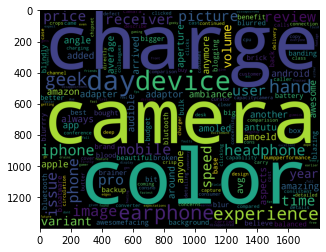

In [50]:
plt.imshow(wordcloud)

## 3 Sentimental Analysis

In [52]:
with open("positive-words.txt","r") as pw:
    positive_words = pw.read().split("\n")

In [53]:
positive_words = positive_words[35:]

In [54]:
with open("negative-words.txt","r", encoding='latin-1') as nw:
    negative_words = nw.read().split("\n")

In [55]:
negative_words = negative_words[35:]

In [56]:
txt_neg_in_nw = ' '.join([word for word in df if word in negative_words])

In [57]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

In [58]:
txt_pos_in_pw = ' '.join([word for word in df if word in positive_words])

In [59]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

## 4 Conclusion

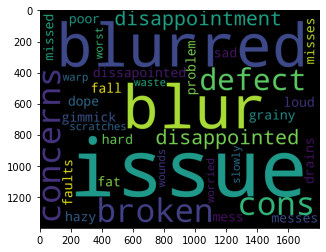

In [60]:
plt.imshow(wordcloud_neg)

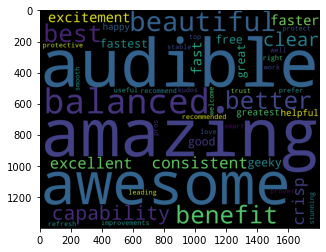

In [61]:
plt.imshow(wordcloud_pos)